### Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

### Read CSV file and obtain the location (Bilbao Ingenieros, same as K-means)

In [35]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_DATOS
df1_location = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_DATOS.csv")

# Make a copy
df_location = df1_location.copy()

# Extract from CSV file the 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2' to obtain 'ap_name'
# 1st drop unnnecesary data
df_location.drop(labels=["id","ip_address","ip_type","type","vendor","avg_session_throughput","troughput", "interface",
"ap_mac_address","ap_ip_address","ssid","vlan","protocol","status","on_network","association_time","session_length",
"first_seen","traffic","encryption_cipher","rssi","snr","802_11u_client"], axis=1, inplace=True)

# 2nd stay only with data that 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2'
df_location = df_location[(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 1')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 2')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 3')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 4')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta Baja')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Sotano 1')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Sotano 2') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P0') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P1') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P2') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P3')]

# Show
df_location

,location,ap_name
2,BIZ-Bilbao > Ingenieros > Planta 2,AP-ETSIIyT-1602E-U022766
7,BIZ-Bilbao > Ingenieros > Planta 3,AP-ETSIIyT-1702-U022650
9,BIZ-Leioa > Magisterio > P3,AP-EGB-Leioa-1142-U016992
16,BIZ-Bilbao > Ingenieros > Planta 3,AP-ETSIIyT-1702-U022388
22,BIZ-Leioa > Magisterio > P0,AP-EGB-Leioa-1142-U010867
...,...,...
69783,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-2802-U034564
69787,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-2802-U032095
69788,BIZ-Leioa > Magisterio > P2,AP-EGB-Leioa-2802-U037630
69790,BIZ-Bilbao > Ingenieros > Planta 2,AP-ETSIIyT-1602E-U022767


### Obtain with the 'ap_name' the 'suma_troghput' & 'cuenta_de_ip_address' 

In [36]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv
df1_ap = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv")

# Make a copy
df_ap = df1_ap.copy()

# Extract from CSV file the 'etiquetas_de_fila' of the df_location['ap_name']
# 1st save data of df_location['ap_name']
ap_name = df_location['ap_name']

# 2nd stay only the data of the 'ap_name'
df_ap_filter = df_ap[df_ap["etiquetas_de_fila"].isin(ap_name)]

# Show
df_ap_filter

,etiquetas_de_fila,suma_de_troughput,cuenta_de_ip_address
485,AP-EGB-3702-U034482,"109,8",4.0
521,AP-EGB-Leioa-1142-U010865,"9353,2",33.0
522,AP-EGB-Leioa-1142-U010866,"6481,6",39.0
523,AP-EGB-Leioa-1142-U010867,"60486,5",94.0
524,AP-EGB-Leioa-1142-U010868,"2623,5",14.0
...,...,...,...
758,AP-ETSIIyT-3702-U022252,"6543,8",9.0
759,AP-ETSIIyT-3702-U022253,"1434,2",7.0
760,AP-ETSIIyT-3702-U022254,"1938,1",3.0
761,AP-ETSIIyT-3702-U022648,"13670,1",27.0


### Drop the unnecsary data

In [37]:
df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)

# Convert String to float of df_ap_filter['suma_de_troughput'] column
# Replace ',' of the String to be able to convert to Float
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].astype(float)

# Show info of dataframe
df_ap_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 485 to 762
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   suma_de_troughput     191 non-null    float64
 1   cuenta_de_ip_address  191 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


C:\Users\alvar\AppData\Local\Temp\ipykernel_10472\32999323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_10472\32999323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
C:\Users\alvar\AppData\Local\Temp\ipykernel_10472\32999323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

### DBSCAN
* For random eps value and min_samples value 

C:\Users\alvar\AppData\Local\Temp\ipykernel_10472\752855176.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


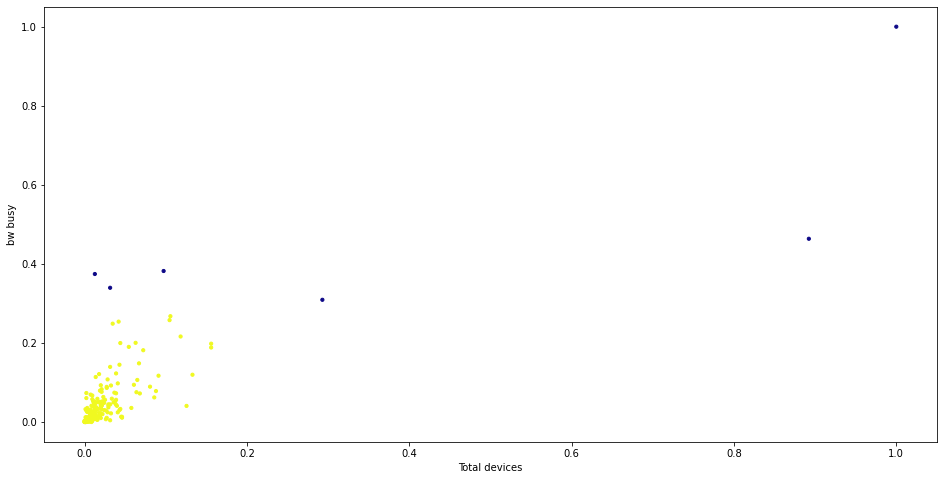

In [38]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan = DBSCAN(eps= 0.08, min_samples= 4)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values
y = df_escalado['bw_busy'].values 

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters 
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Determining the correct epsilon
* The epsilon and min_samples are random values
* To determine the correct epsilon --> elbow method
* Determine a number of min_sample:
    * If the dataset has two dimensions, use the min sample per cluster as 4. (Ester et al., 1996)
    * If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension. (Sander et al., 1998)

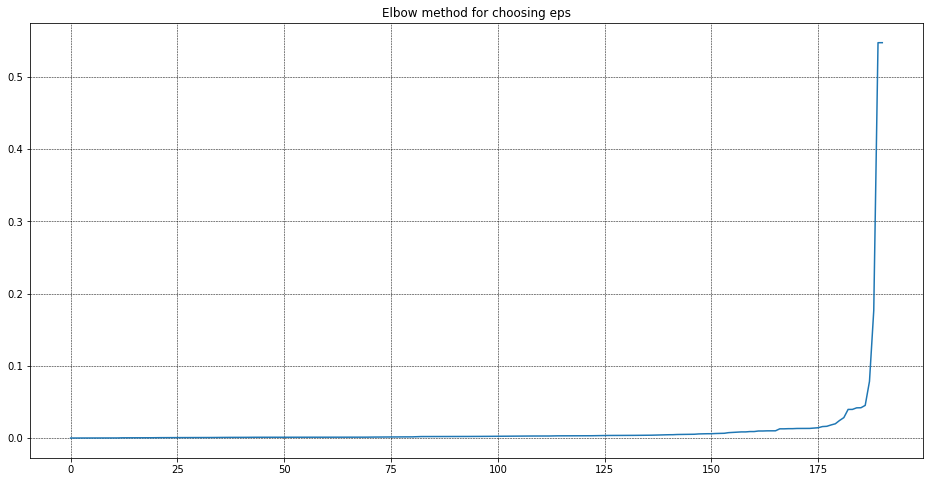

In [39]:
from sklearn.neighbors import NearestNeighbors
# min_samples
n = 4
# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n+1) #Revisar XQ
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)

distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Expand the image
* The limit of x axis --> 110 and 140
* The limit of y axis --> 0 and 10000

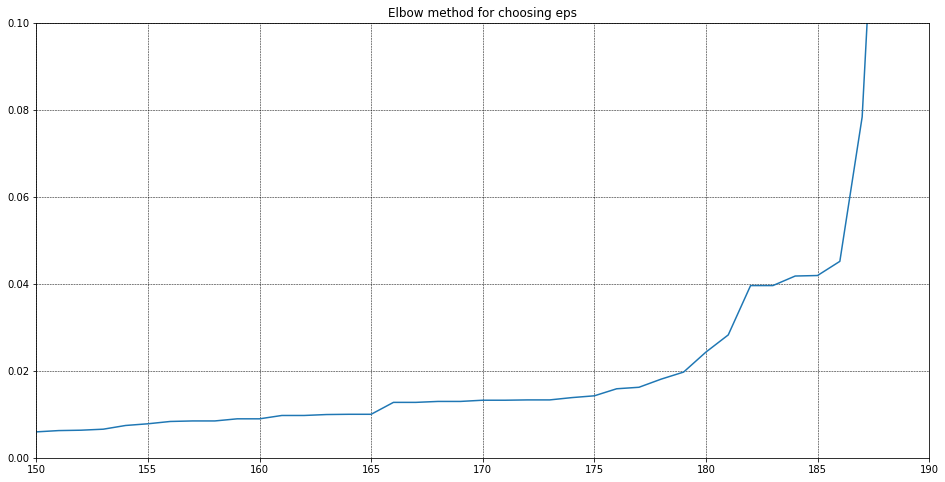

In [40]:
# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n+1) # Revisar XQ
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)

distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances
plt.figure(figsize=(16,8))
plt.title("Elbow method for choosing eps")
plt.ylim(0, 0.1)
plt.xlim(150, 190)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Determine the epsilon
* eps = 0.01
* eps = 0.06

C:\Users\alvar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\alvar\AppData\Local\Temp\ipykernel_10472\3987812994.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


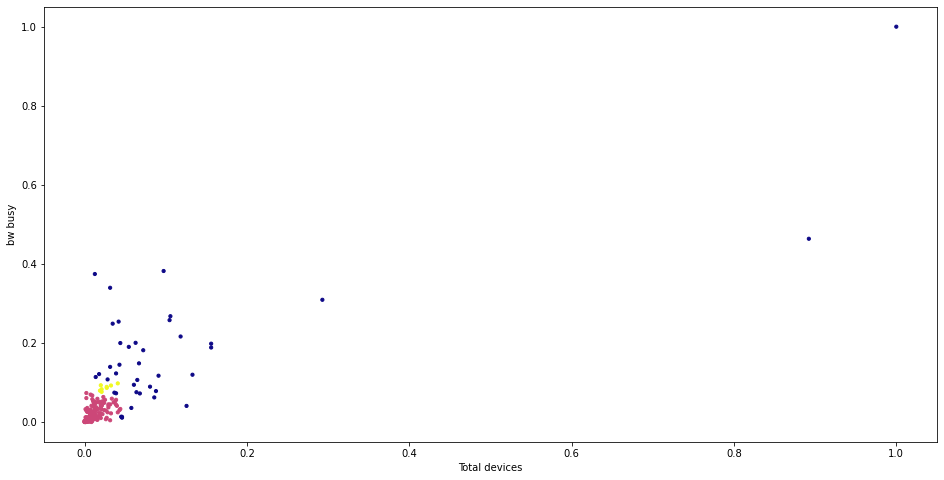

In [41]:
# 1st try with eps = 0.01
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_ap_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# Epsilon 
e = 0.01

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### Count of cluster

In [42]:
copy = pd.DataFrame()
copy['bw_busy']=df_ap_filter['suma_de_troughput'].values
copy['total_devices']=df_ap_filter['cuenta_de_ip_address'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,40
0,143
1,8


C:\Users\alvar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\alvar\AppData\Local\Temp\ipykernel_10472\1685354252.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['Cluster'] = cluster


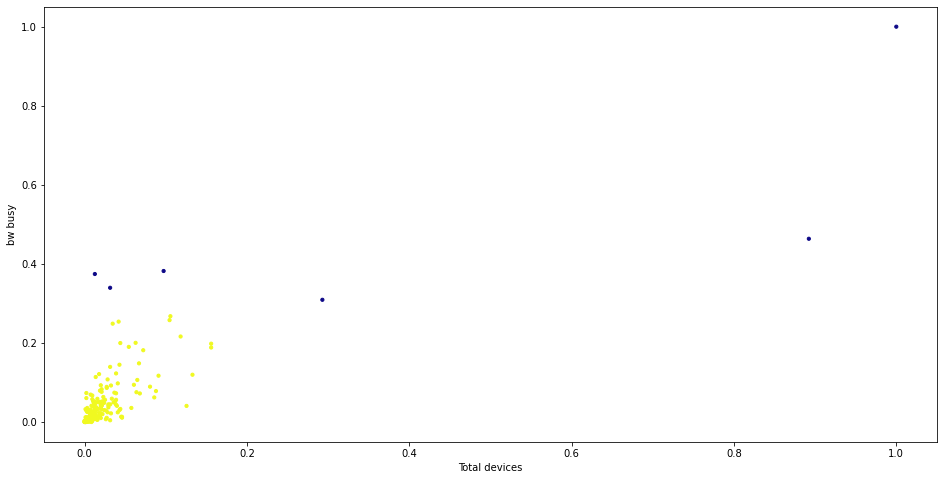

In [43]:
# 2nd try with eps = 0.06
# Epsilon 
e = 0.06

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_ap_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of cluster

In [44]:
copy = pd.DataFrame()
copy['bw_busy']=df_ap_filter['suma_de_troughput'].values
copy['total_devices']=df_ap_filter['cuenta_de_ip_address'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,6
0,185
